In [1]:
import algorithms as alg
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib
import time
import pickle
import scipy
from scipy.stats import norm
from scipy.stats import multivariate_normal as mltnorm
from scipy.sparse import csr_matrix
%matplotlib inline

In [2]:
from functions import *

In [3]:
from algorithms import *

In [4]:
from utils import *

# Big sigma

## m = 1

### ARDFDS_E

In [5]:
n = 500
L = 10
m = 1
a = np.array(range(n))*1.0
a = a / np.linalg.norm(a)

t = 1e-8

x_star = np.ones(n) - np.array(range(1,n+1)) * 1.0 / (n+1)
f_star = (1.0*L/8) * (-1 + 1.0/(n+1))
# print(f_star, Nesterov_func(x_star, [L]))

num_of_non_zeros = 1
x_init = deepcopy(x_star)
x_init[0:num_of_non_zeros] = 10
N = 500000

filename = "nesterov_n_"+str(n)+"_L_"+str(L)+"_init_first_"+str(num_of_non_zeros)+"_10"

tuning_stepsize_param_options_ardfds_e = [1.0, 0.1, 0.01]


print("f(x_0)-f(x^*) = ", Nesterov_func(x_init, [L]) - f_star)
epsilon = 1e-3
sigma_theory = np.sqrt((epsilon ** (1.5)) * (n ** (0.5)) *np.sqrt(L) / np.linalg.norm(x_init - x_star, ord=1))
print(sigma_theory)


sigma = deepcopy(sigma_theory)*100
delta = 0
param = [Nesterov_func, L, sigma, delta, t]

f(x_0)-f(x^*) =  202.58983031940127
0.015760612563135865


In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = ardfds_e_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

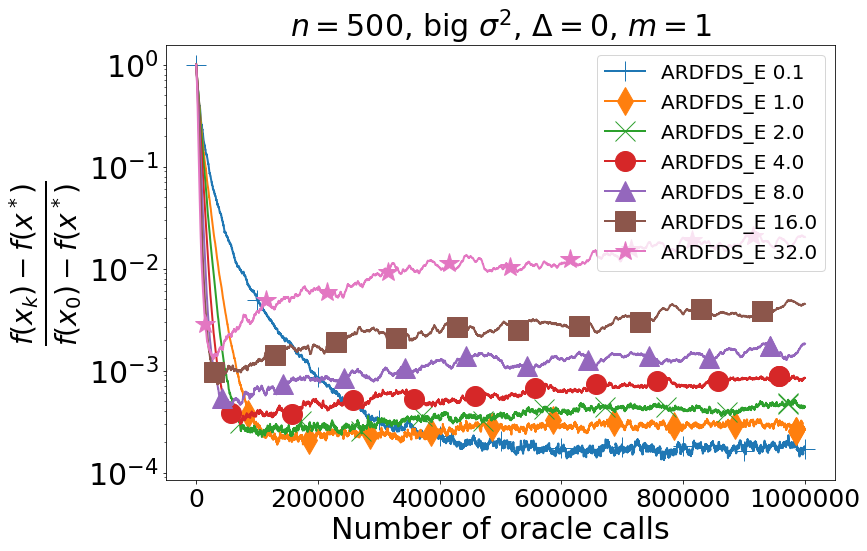

In [6]:
methods = [['ARDFDS_E noise', [0.1, N, sigma, delta, m], "ARDFDS_E "+str(0.1), None]]
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['ARDFDS_E noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "ARDFDS_E "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 25
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_ardfds_e_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### ARDFDS_NE

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 100.0, 500.0, 1000.0, 2000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = ardfds_ne_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

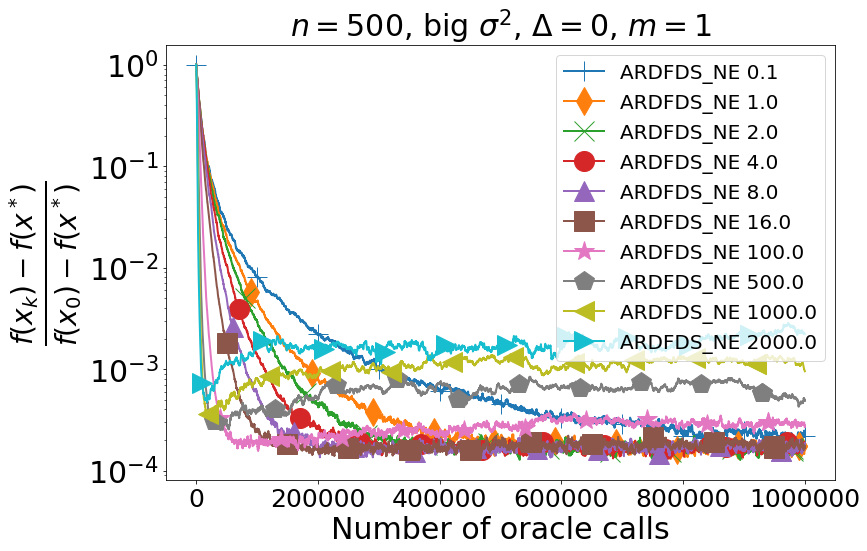

In [7]:
methods = [['ARDFDS_NE noise', [0.1, N, sigma, delta, m], "ARDFDS_NE "+str(0.1), None]]
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 100.0, 500.0, 1000.0, 2000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['ARDFDS_NE noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "ARDFDS_NE "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 25
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_ardfds_ne_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RDFDS_E

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 150.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = rdfds_e_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

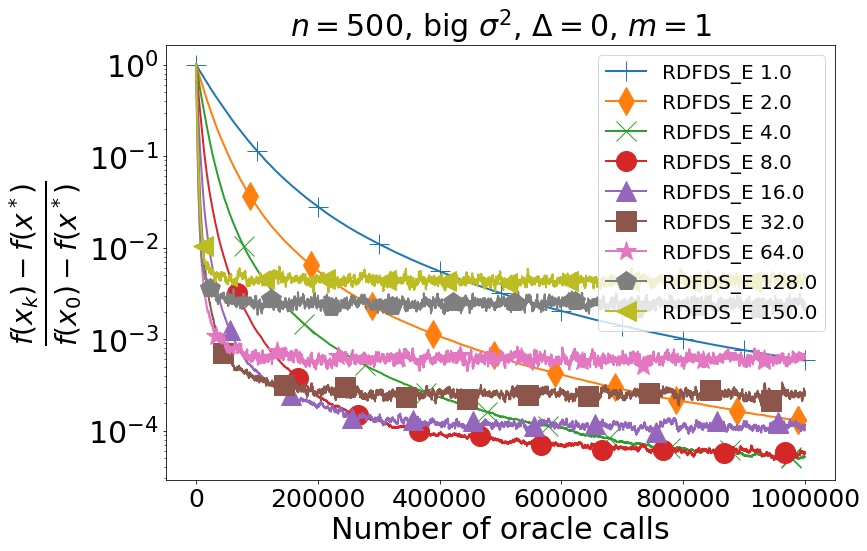

In [8]:
methods = [['RDFDS_E noise', [1.0, N, sigma, delta, m], "RDFDS_E "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 150.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RDFDS_E noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RDFDS_E "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 25
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rdfds_e_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RDFDS_NE

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 100.0, 500.0, 1000.0, 2000.0, 10000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = rdfds_ne_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

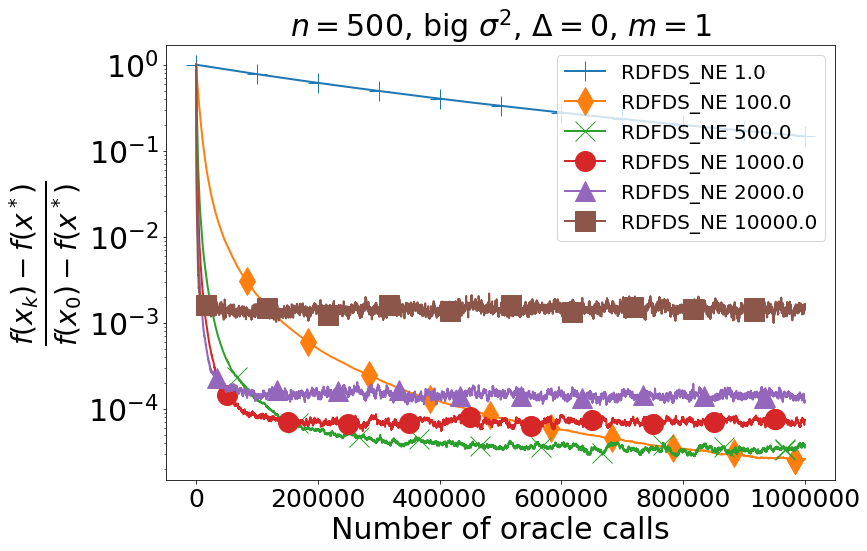

In [9]:
methods = [['RDFDS_NE noise', [1.0, N, sigma, delta, m], "RDFDS_NE "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 100.0, 500.0, 1000.0, 2000.0, 10000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RDFDS_NE noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RDFDS_NE "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 25
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rdfds_ne_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RSGF

In [ ]:
%%time
initial_stepsizes = [1.0]
tuning_stepsizes = [1.0, 2.0, 4.0, 10.0]

for initial_stepsize in initial_stepsizes:
    for tuning_stepsize in tuning_stepsizes:
        res = rsgf_tune_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, initial_stepsize=initial_stepsize,tuning_stepsize=tuning_stepsize)
        print("Finished with ", tuning_stepsize)

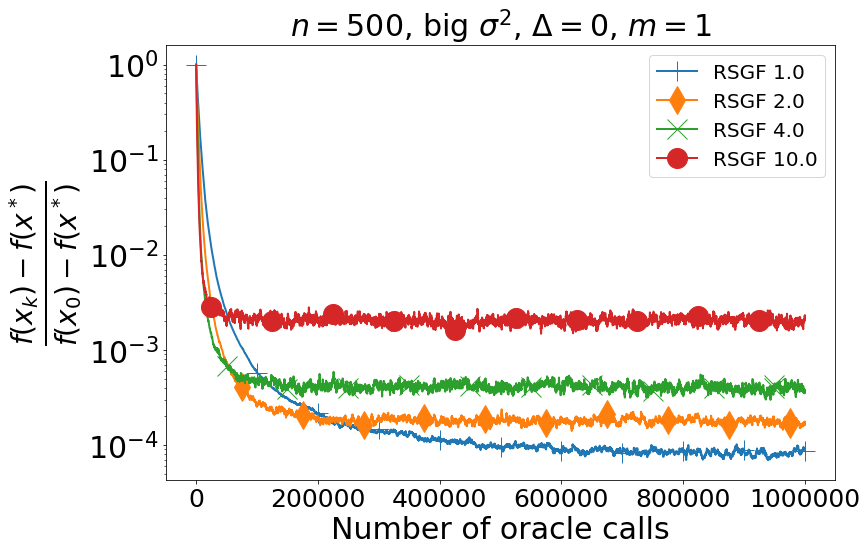

In [10]:
methods = [['RSGF tune noise', [1.0, 1.0, N, sigma, delta, m], "RSGF "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 10.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RSGF tune noise', [1.0, tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RSGF "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 25
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rsgf_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### Comparison

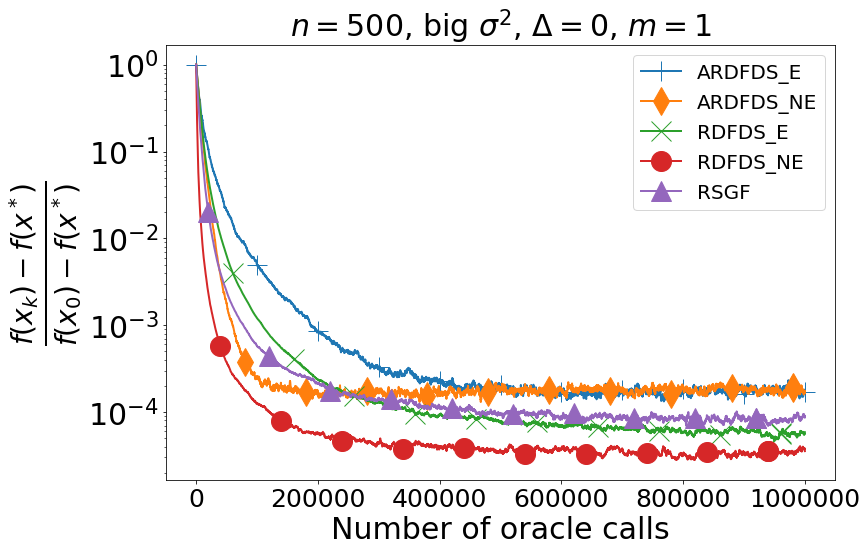

In [11]:
methods = [
    ['ARDFDS_E noise', [0.1, N, sigma, delta, m], "ARDFDS_E", None],
    ['ARDFDS_NE noise', [16.0, N, sigma, delta, m], "ARDFDS_NE", None],
    ['RDFDS_E noise', [8.0, N, sigma, delta, m], "RDFDS_E", None],
    ['RDFDS_NE noise', [500.0, N, sigma, delta, m], "RDFDS_NE", None],
    ['RSGF tune noise', [1.0, 1.0, N, sigma, delta, m], "RSGF", None],
    ]

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 25
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_comparison_noise_sigma_"+str(sigma)+"_delta_"+str(delta)+"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

## m = 10

### ARDFDS_E

In [18]:
n = 500
L = 10
m = 10
a = np.array(range(n))*1.0
a = a / np.linalg.norm(a)

t = 1e-8

x_star = np.ones(n) - np.array(range(1,n+1)) * 1.0 / (n+1)
f_star = (1.0*L/8) * (-1 + 1.0/(n+1))
# print(f_star, Nesterov_func(x_star, [L]))

num_of_non_zeros = 1
x_init = deepcopy(x_star)
x_init[0:num_of_non_zeros] = 10
N = 500000

filename = "nesterov_n_"+str(n)+"_L_"+str(L)+"_init_first_"+str(num_of_non_zeros)+"_10"

tuning_stepsize_param_options_ardfds_e = [1.0, 0.1, 0.01]


print("f(x_0)-f(x^*) = ", Nesterov_func(x_init, [L]) - f_star)
epsilon = 1e-3
sigma_theory = np.sqrt((epsilon ** (1.5)) * (n ** (0.5)) *np.sqrt(L) / np.linalg.norm(x_init - x_star, ord=1))
print(sigma_theory)


sigma = deepcopy(sigma_theory)*100
delta = 0
param = [Nesterov_func, L, sigma, delta, t]

f(x_0)-f(x^*) =  202.58983031940127
0.015760612563135865


In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = ardfds_e_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

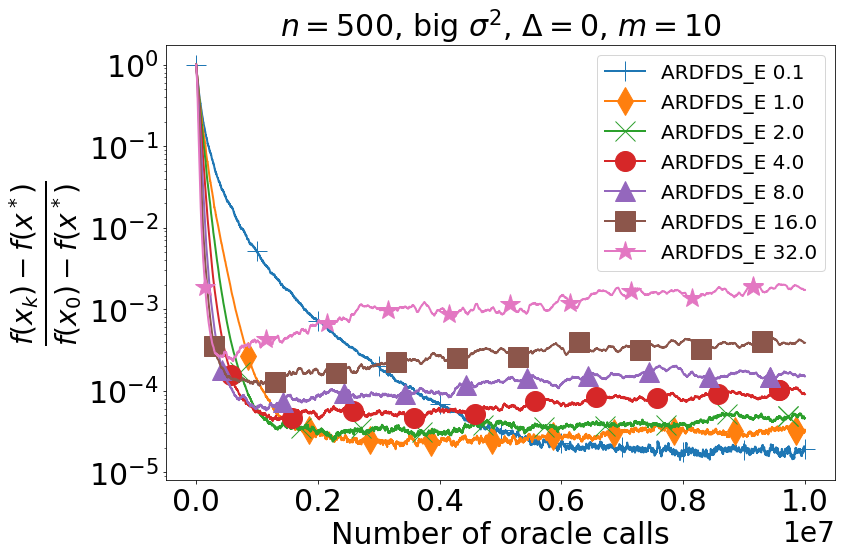

In [19]:
methods = [['ARDFDS_E noise', [0.1, N, sigma, delta, m], "ARDFDS_E "+str(0.1), None]]
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['ARDFDS_E noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "ARDFDS_E "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_ardfds_e_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### ARDFDS_NE

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 100.0, 500.0, 1000.0, 2000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = ardfds_ne_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

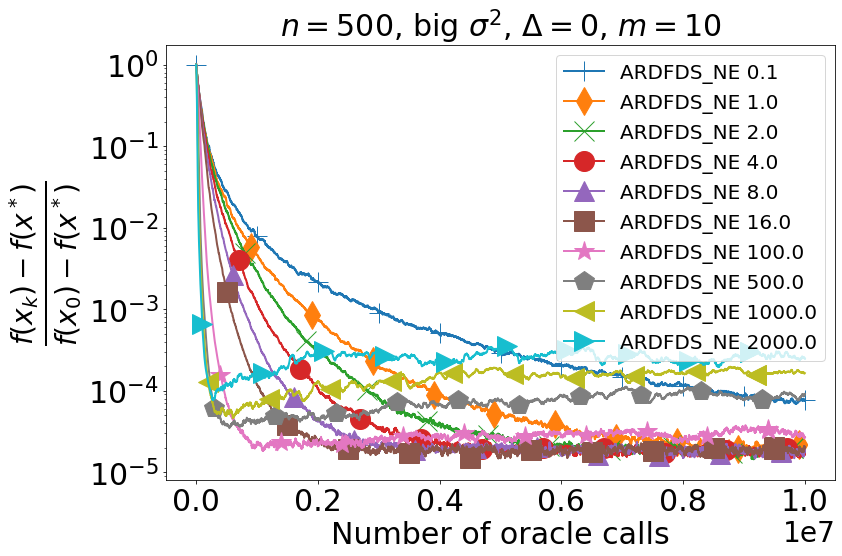

In [20]:
methods = [['ARDFDS_NE noise', [0.1, N, sigma, delta, m], "ARDFDS_NE "+str(0.1), None]]
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 100.0, 500.0, 1000.0, 2000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['ARDFDS_NE noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "ARDFDS_NE "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_ardfds_ne_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RDFDS_E

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 150.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = rdfds_e_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

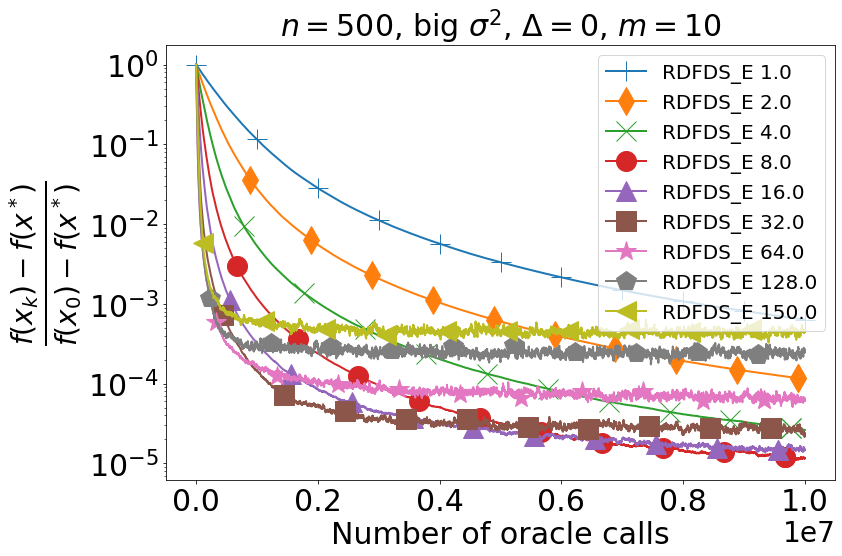

In [21]:
methods = [['RDFDS_E noise', [1.0, N, sigma, delta, m], "RDFDS_E "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 150.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RDFDS_E noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RDFDS_E "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rdfds_e_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RDFDS_NE

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 100.0, 500.0, 1000.0, 2000.0, 10000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = rdfds_ne_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

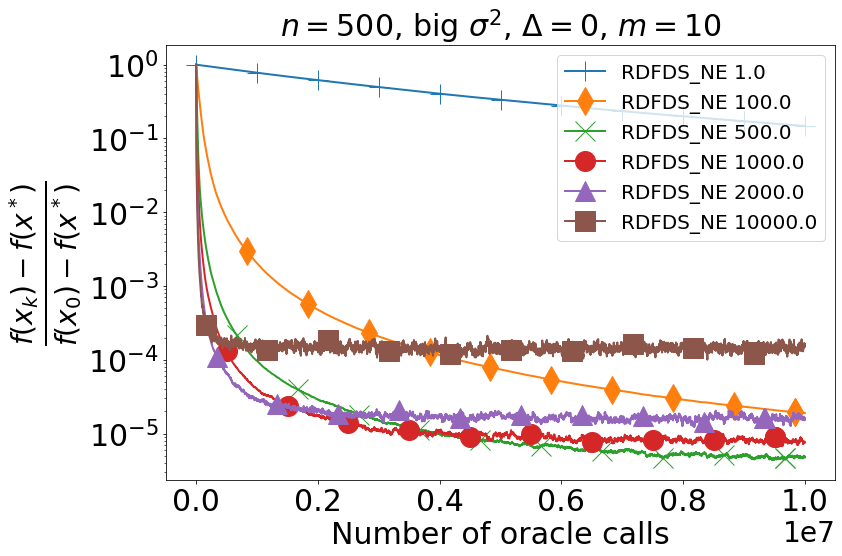

In [22]:
methods = [['RDFDS_NE noise', [1.0, N, sigma, delta, m], "RDFDS_NE "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 100.0, 500.0, 1000.0, 2000.0, 10000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RDFDS_NE noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RDFDS_NE "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rdfds_ne_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RSGF

In [ ]:
%%time
initial_stepsizes = [1.0]
tuning_stepsizes = [1.0, 2.0, 4.0, 10.0]

for initial_stepsize in initial_stepsizes:
    for tuning_stepsize in tuning_stepsizes:
        res = rsgf_tune_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, initial_stepsize=initial_stepsize,tuning_stepsize=tuning_stepsize)
        print("Finished with ", tuning_stepsize)

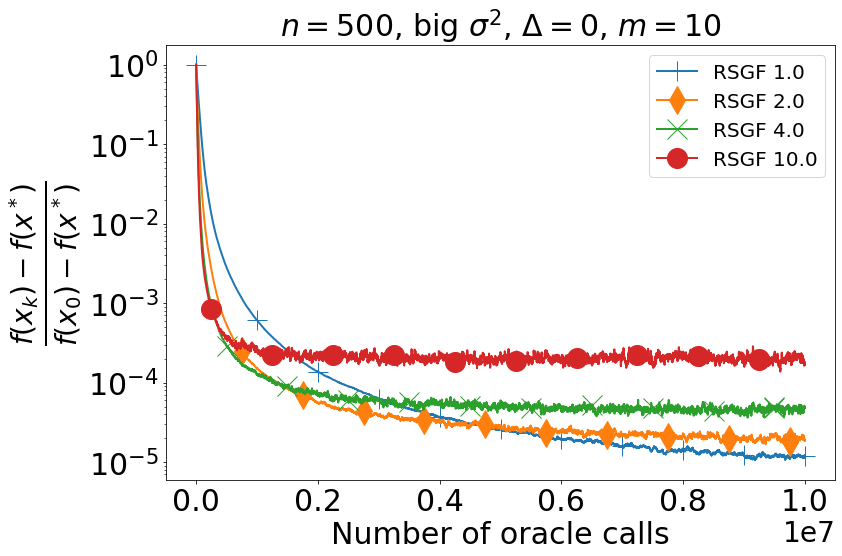

In [23]:
methods = [['RSGF tune noise', [1.0, 1.0, N, sigma, delta, m], "RSGF "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 10.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RSGF tune noise', [1.0, tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RSGF "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rsgf_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### Comparison

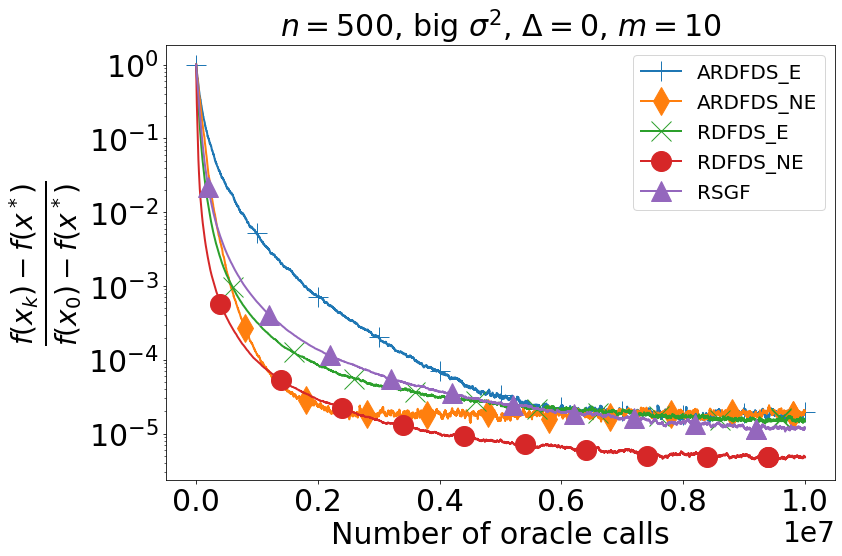

In [24]:
methods = [
    ['ARDFDS_E noise', [0.1, N, sigma, delta, m], "ARDFDS_E", None],
    ['ARDFDS_NE noise', [16.0, N, sigma, delta, m], "ARDFDS_NE", None],
    ['RDFDS_E noise', [16.0, N, sigma, delta, m], "RDFDS_E", None],
    ['RDFDS_NE noise', [500.0, N, sigma, delta, m], "RDFDS_NE", None],
    ['RSGF tune noise', [1.0, 1.0, N, sigma, delta, m], "RSGF", None],
    ]

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_comparison_noise_sigma_"+str(sigma)+"_delta_"+str(delta)+"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

## m = 100

### ARDFDS_E

In [25]:
n = 500
L = 10
m = 100
a = np.array(range(n))*1.0
a = a / np.linalg.norm(a)

t = 1e-8

x_star = np.ones(n) - np.array(range(1,n+1)) * 1.0 / (n+1)
f_star = (1.0*L/8) * (-1 + 1.0/(n+1))
# print(f_star, Nesterov_func(x_star, [L]))

num_of_non_zeros = 1
x_init = deepcopy(x_star)
x_init[0:num_of_non_zeros] = 10
N = 500000

filename = "nesterov_n_"+str(n)+"_L_"+str(L)+"_init_first_"+str(num_of_non_zeros)+"_10"

tuning_stepsize_param_options_ardfds_e = [1.0, 0.1, 0.01]


print("f(x_0)-f(x^*) = ", Nesterov_func(x_init, [L]) - f_star)
epsilon = 1e-3
sigma_theory = np.sqrt((epsilon ** (1.5)) * (n ** (0.5)) *np.sqrt(L) / np.linalg.norm(x_init - x_star, ord=1))
print(sigma_theory)


sigma = deepcopy(sigma_theory)*100
delta = 0
param = [Nesterov_func, L, sigma, delta, t]

f(x_0)-f(x^*) =  202.58983031940127
0.015760612563135865


In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = ardfds_e_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

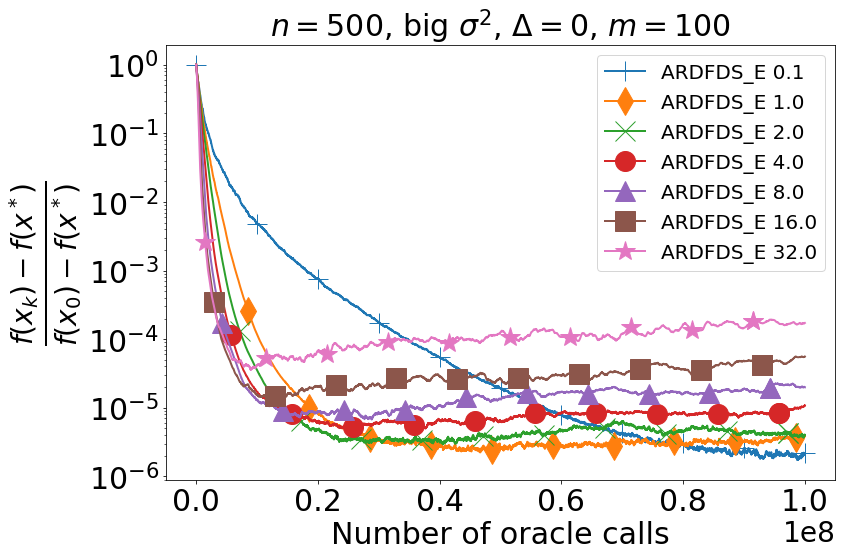

In [26]:
methods = [['ARDFDS_E noise', [0.1, N, sigma, delta, m], "ARDFDS_E "+str(0.1), None]]
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['ARDFDS_E noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "ARDFDS_E "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_ardfds_e_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### ARDFDS_NE

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 100.0, 500.0, 1000.0, 2000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = ardfds_ne_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

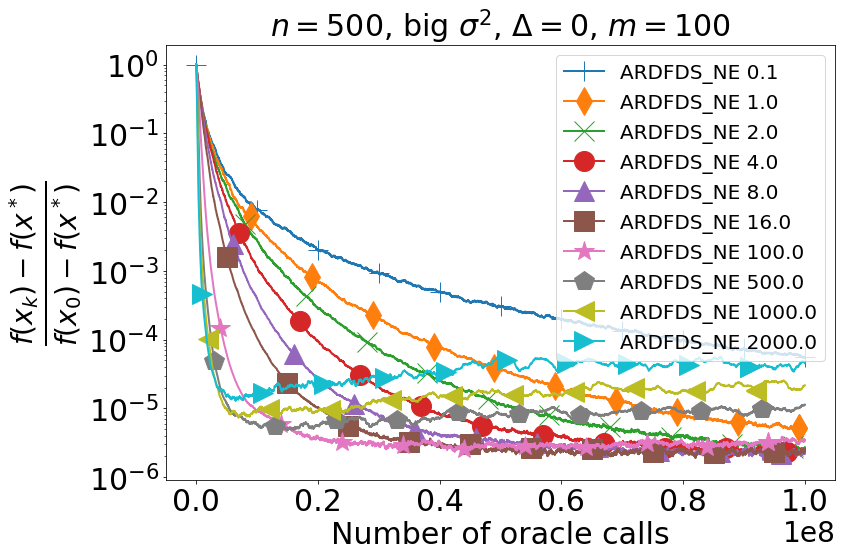

In [27]:
methods = [['ARDFDS_NE noise', [0.1, N, sigma, delta, m], "ARDFDS_NE "+str(0.1), None]]
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 100.0, 500.0, 1000.0, 2000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['ARDFDS_NE noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "ARDFDS_NE "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_ardfds_ne_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RDFDS_E

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 150.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = rdfds_e_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

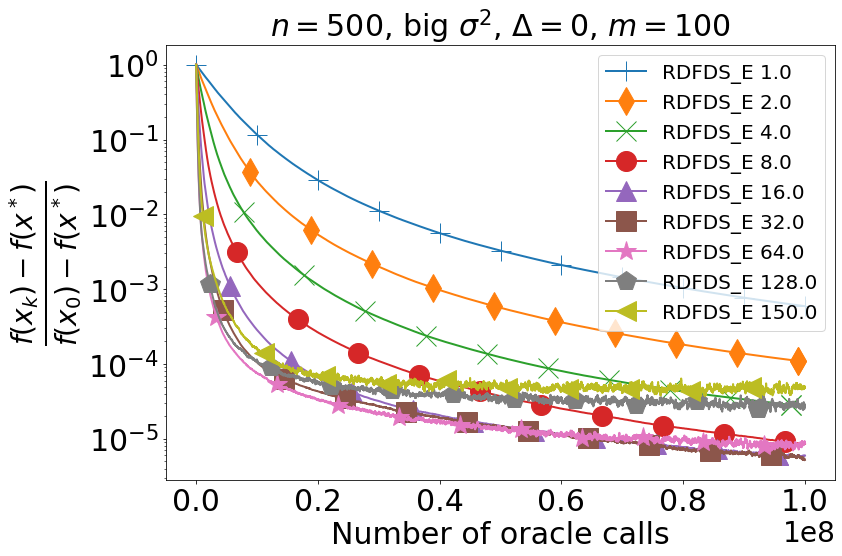

In [28]:
methods = [['RDFDS_E noise', [1.0, N, sigma, delta, m], "RDFDS_E "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 150.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RDFDS_E noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RDFDS_E "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rdfds_e_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RDFDS_NE

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 100.0, 500.0, 1000.0, 2000.0, 10000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = rdfds_ne_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

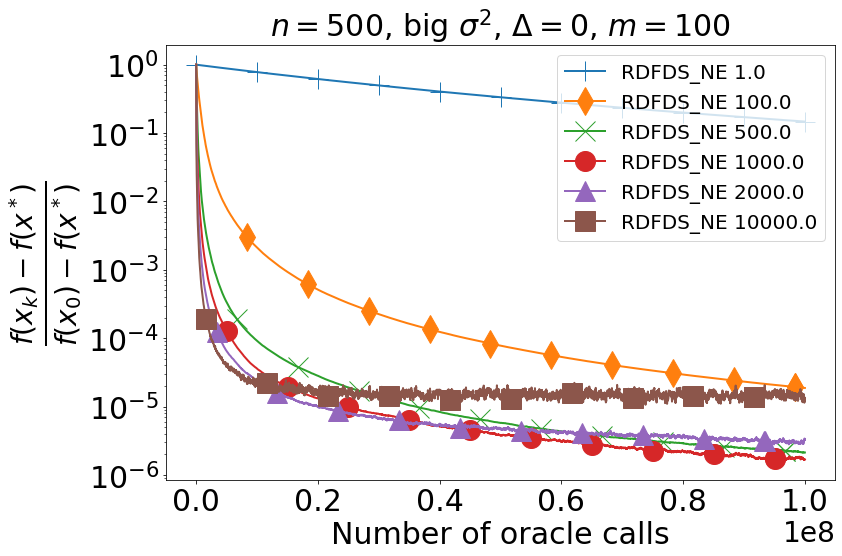

In [29]:
methods = [['RDFDS_NE noise', [1.0, N, sigma, delta, m], "RDFDS_NE "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 100.0, 500.0, 1000.0, 2000.0, 10000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RDFDS_NE noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RDFDS_NE "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rdfds_ne_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RSGF

In [ ]:
%%time
initial_stepsizes = [1.0]
tuning_stepsizes = [1.0, 2.0, 4.0, 10.0]

for initial_stepsize in initial_stepsizes:
    for tuning_stepsize in tuning_stepsizes:
        res = rsgf_tune_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, initial_stepsize=initial_stepsize,tuning_stepsize=tuning_stepsize)
        print("Finished with ", tuning_stepsize)

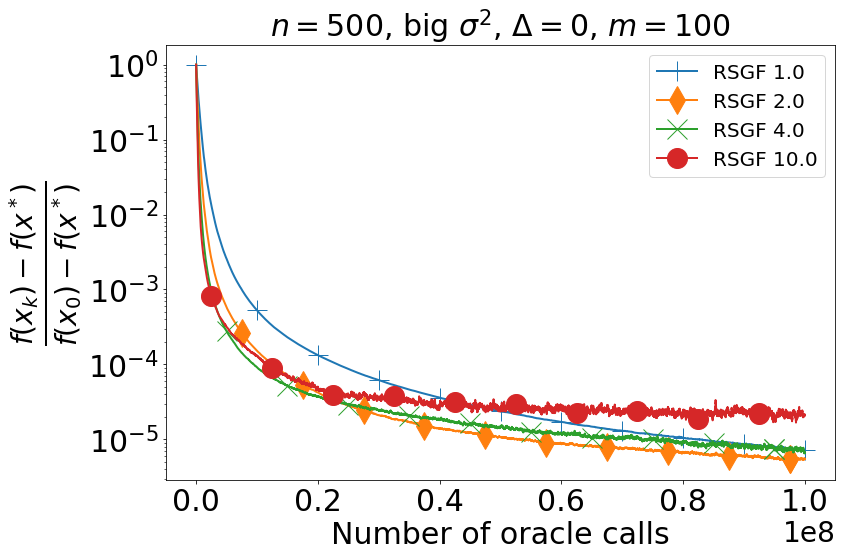

In [30]:
methods = [['RSGF tune noise', [1.0, 1.0, N, sigma, delta, m], "RSGF "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 10.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RSGF tune noise', [1.0, tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RSGF "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rsgf_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### Comparison

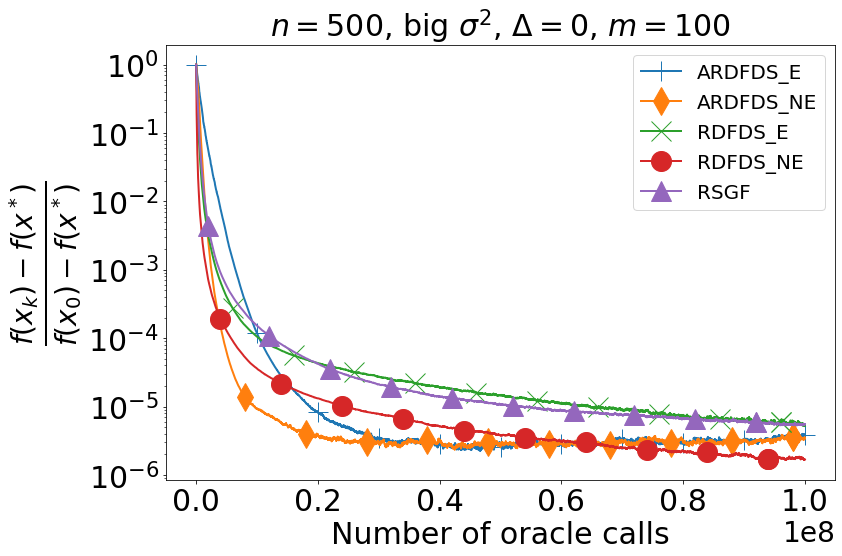

In [31]:
methods = [
    ['ARDFDS_E noise', [1.0, N, sigma, delta, m], "ARDFDS_E", None],
    ['ARDFDS_NE noise', [100.0, N, sigma, delta, m], "ARDFDS_NE", None],
    ['RDFDS_E noise', [32.0, N, sigma, delta, m], "RDFDS_E", None],
    ['RDFDS_NE noise', [1000.0, N, sigma, delta, m], "RDFDS_NE", None],
    ['RSGF tune noise', [1.0, 2.0, N, sigma, delta, m], "RSGF", None],
    ]

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_comparison_noise_sigma_"+str(sigma)+"_delta_"+str(delta)+"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

## m = 1000

### ARDFDS_E

In [32]:
n = 500
L = 10
m = 1000
a = np.array(range(n))*1.0
a = a / np.linalg.norm(a)

t = 1e-8

x_star = np.ones(n) - np.array(range(1,n+1)) * 1.0 / (n+1)
f_star = (1.0*L/8) * (-1 + 1.0/(n+1))
# print(f_star, Nesterov_func(x_star, [L]))

num_of_non_zeros = 1
x_init = deepcopy(x_star)
x_init[0:num_of_non_zeros] = 10
N = 500000

filename = "nesterov_n_"+str(n)+"_L_"+str(L)+"_init_first_"+str(num_of_non_zeros)+"_10"

tuning_stepsize_param_options_ardfds_e = [1.0, 0.1, 0.01]


print("f(x_0)-f(x^*) = ", Nesterov_func(x_init, [L]) - f_star)
epsilon = 1e-3
sigma_theory = np.sqrt((epsilon ** (1.5)) * (n ** (0.5)) *np.sqrt(L) / np.linalg.norm(x_init - x_star, ord=1))
print(sigma_theory)


sigma = deepcopy(sigma_theory)*100
delta = 0
param = [Nesterov_func, L, sigma, delta, t]

f(x_0)-f(x^*) =  202.58983031940127
0.015760612563135865


In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = ardfds_e_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

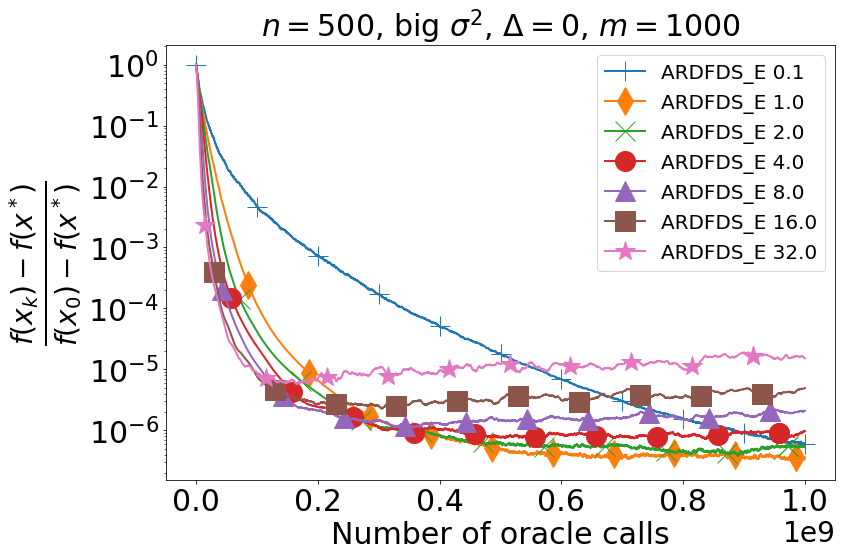

In [33]:
methods = [['ARDFDS_E noise', [0.1, N, sigma, delta, m], "ARDFDS_E "+str(0.1), None]]
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['ARDFDS_E noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "ARDFDS_E "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_ardfds_e_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### ARDFDS_NE

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 100.0, 500.0, 1000.0, 2000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = ardfds_ne_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

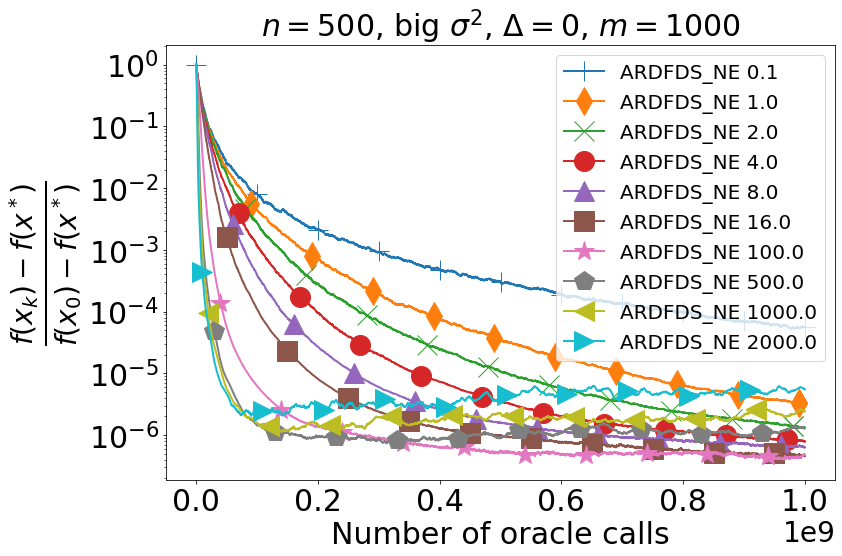

In [34]:
methods = [['ARDFDS_NE noise', [0.1, N, sigma, delta, m], "ARDFDS_NE "+str(0.1), None]]
tuning_stepsize_param_options_ardfds_e = [0.1, 1.0, 2.0, 4.0, 8.0, 16.0, 100.0, 500.0, 1000.0, 2000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['ARDFDS_NE noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "ARDFDS_NE "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_ardfds_ne_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RDFDS_E

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 150.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = rdfds_e_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

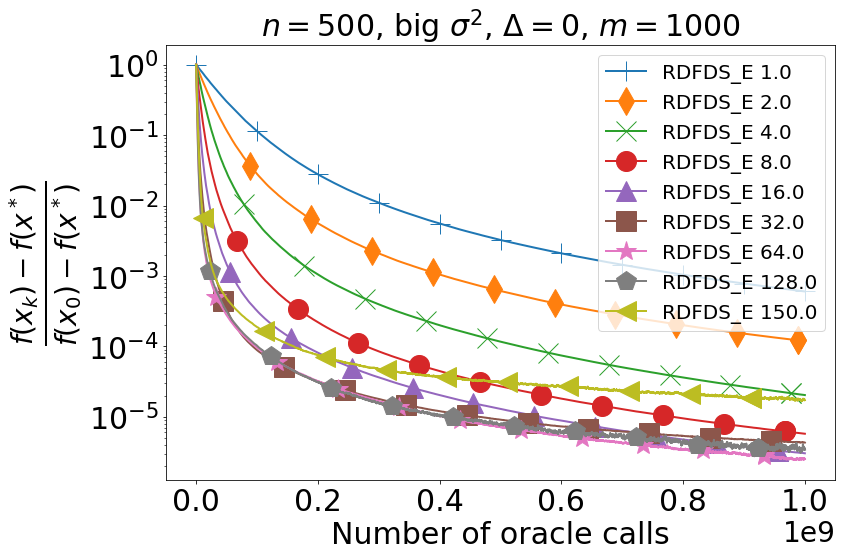

In [35]:
methods = [['RDFDS_E noise', [1.0, N, sigma, delta, m], "RDFDS_E "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 150.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RDFDS_E noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RDFDS_E "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rdfds_e_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RDFDS_NE

In [ ]:
%%time
tuning_stepsize_param_options_ardfds_e = [1.0, 100.0, 500.0, 1000.0, 2000.0, 10000.0]
for step_param in tuning_stepsize_param_options_ardfds_e:
    ardfds_e_res = rdfds_ne_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, tuning_stepsize_param=step_param)
    print("Finished with stepsize parameter = ", step_param)

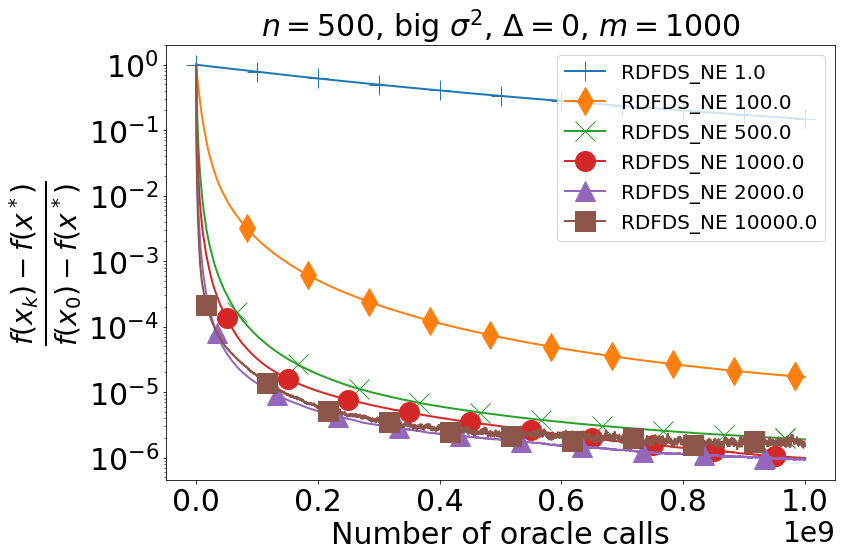

In [36]:
methods = [['RDFDS_NE noise', [1.0, N, sigma, delta, m], "RDFDS_NE "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 100.0, 500.0, 1000.0, 2000.0, 10000.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RDFDS_NE noise', [tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RDFDS_NE "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rdfds_ne_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### RSGF

In [ ]:
%%time
initial_stepsizes = [1.0]
tuning_stepsizes = [1.0, 2.0, 4.0, 10.0]

for initial_stepsize in initial_stepsizes:
    for tuning_stepsize in tuning_stepsizes:
        res = rsgf_tune_noise(filename, x_init, a=a, args=param, m=m, N=N, 
                        f_star=f_star, x_star=x_star, initial_stepsize=initial_stepsize,tuning_stepsize=tuning_stepsize)
        print("Finished with ", tuning_stepsize)

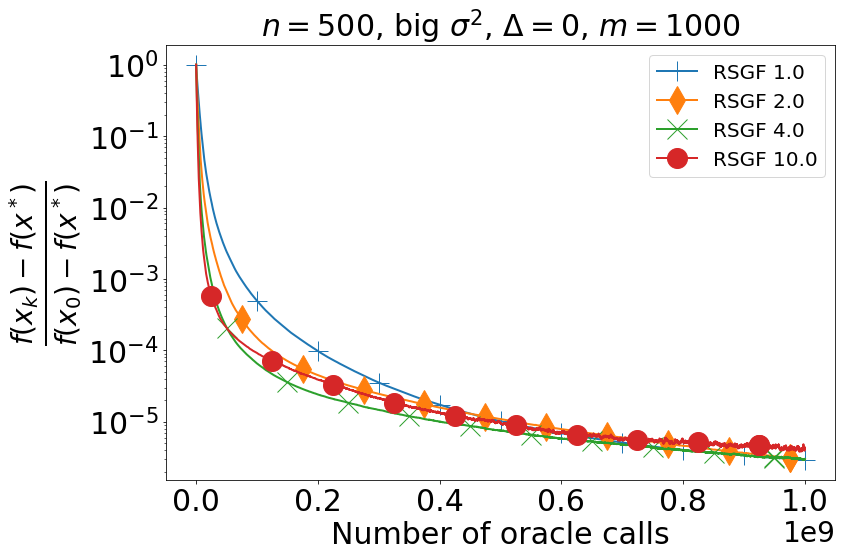

In [37]:
methods = [['RSGF tune noise', [1.0, 1.0, N, sigma, delta, m], "RSGF "+str(1.0), None]]
tuning_stepsize_param_options_ardfds_e = [1.0, 2.0, 4.0, 10.0]
for i in range(1,len(tuning_stepsize_param_options_ardfds_e)):
    methods = np.vstack((methods, 
                         ['RSGF tune noise', [1.0, tuning_stepsize_param_options_ardfds_e[i], N, sigma, delta, m], 
                          "RSGF "+str(tuning_stepsize_param_options_ardfds_e[i]), None]))

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_rsgf_noise_tuning_stepsize_sigma_"+str(sigma)+"_delta_"+str(delta)
            +"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

### Comparison

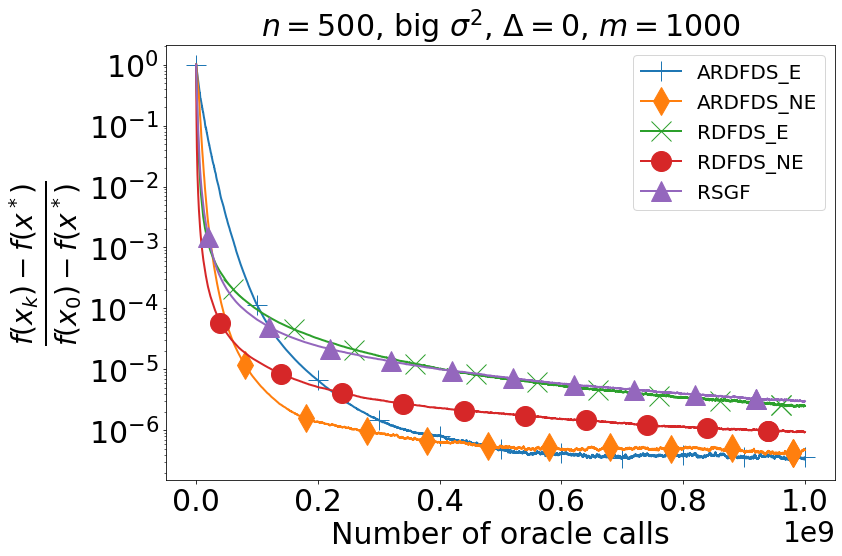

In [38]:
methods = [
    ['ARDFDS_E noise', [1.0, N, sigma, delta, m], "ARDFDS_E", None],
    ['ARDFDS_NE noise', [100.0, N, sigma, delta, m], "ARDFDS_NE", None],
    ['RDFDS_E noise', [64.0, N, sigma, delta, m], "RDFDS_E", None],
    ['RDFDS_NE noise', [2000.0, N, sigma, delta, m], "RDFDS_NE", None],
    ['RSGF tune noise', [1.0, 4.0, N, sigma, delta, m], "RSGF", None],
    ]

mode_y = 'func_vals'
mode_x = 'oracle_calls'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 20
legend_size = 20
xlabel_size = 30
ylabel_size = 40
xticks_size = 30
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = r'$n = $'+str(n)+r', big $\sigma^2$, $\Delta = 0$, $m = $'+str(m)
bbox_to_anchor = (1,1)
legend_loc="upper right"

save_fig = [True, filename+"_comparison_noise_sigma_"+str(sigma)+"_delta_"+str(delta)+"_batch_"+str(m)+".pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)